In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
# Dataset Import
movie_reviews = pd.read_csv("/content/drive/MyDrive/NLP/GK/Data/IMDB Dataset.csv")

In [ ]:
# Check if Dataframe has null values
movie_reviews.isnull().values.any()

False

In [ ]:
# Display first 5 rows
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


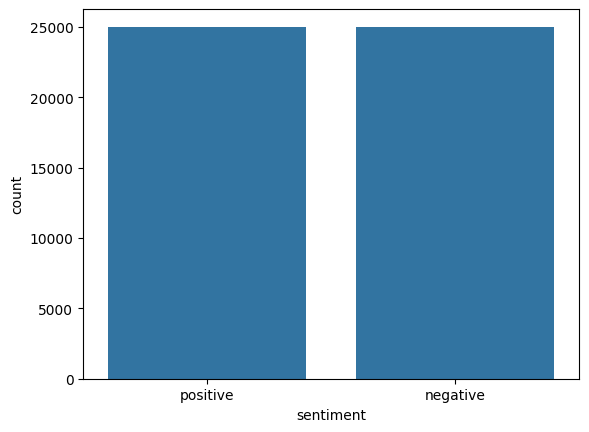

In [ ]:
import seaborn as sns
ax = sns.countplot(x='sentiment', data=movie_reviews)

In [ ]:
# Displaying a review sample
movie_reviews['review'].iloc[3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [ ]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
 return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
# Displaying a review sample ( 4th review )
X[3]

'Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them '

In [ ]:
y = movie_reviews['sentiment']
# We replace positive with 1 and negative with 0
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

92547

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
def embeddings(path):
    embeddings_dictionary = dict()
    embeddings_file = open(path)
    for line in embeddings_file:
        records = line.split()
        word = records[0]
        vector_dimensions = asarray(records[1:],dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
    embeddings_file.close()
    return embeddings_dictionary
embeddings_dictionary=embeddings("/content/drive/MyDrive/NLP/GK/glove.6B.100d.txt")


In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

**LSTM**

In [ ]:
def rnn_clf(X_train,y_train,l,embedding_matrix):
    rnn_clf=Sequential()
    rnn_clf.add(Embedding(vocab_size, l, weights=[embedding_matrix],input_length=maxlen))
    rnn_clf.add(LSTM(128))
    rnn_clf.add(Dense(1,activation='sigmoid'))
    rnn_clf.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    history=rnn_clf.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return rnn_clf,history

In [ ]:
rnn_clf,history=rnn_clf(X_train,y_train,100,embedding_matrix)

Epoch 1/6
250/250 [==============================] - 110s 429ms/step - loss: 0.4826 - acc: 0.7637 - val_loss: 0.3680 - val_acc: 0.8351
Epoch 2/6
250/250 [==============================] - 96s 384ms/step - loss: 0.3367 - acc: 0.8547 - val_loss: 0.3556 - val_acc: 0.8464
Epoch 3/6
250/250 [==============================] - 102s 410ms/step - loss: 0.2863 - acc: 0.8809 - val_loss: 0.3187 - val_acc: 0.8615
Epoch 4/6
250/250 [==============================] - 114s 454ms/step - loss: 0.2585 - acc: 0.8946 - val_loss: 0.3416 - val_acc: 0.8599
Epoch 5/6
250/250 [==============================] - 97s 388ms/step - loss: 0.2344 - acc: 0.9068 - val_loss: 0.3456 - val_acc: 0.8610
Epoch 6/6
250/250 [==============================] - 99s 396ms/step - loss: 0.2098 - acc: 0.9181 - val_loss: 0.3372 - val_acc: 0.8621


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef

# Evaluate the model
y_pred = rnn_clf.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred_binary)
print(f"F1 Score: {f1}")

recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall}")

precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision}")

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

kappa = cohen_kappa_score(y_test, y_pred_binary)
print(f"Kappa: {kappa}")

mcc = matthews_corrcoef(y_test, y_pred_binary)
print(f"MCC: {mcc}")


313/313 [==============================] - 13s 42ms/step
Accuracy: 0.8683
F1 Score: 0.8703101920236337
Recall: 0.8769597142290136
Precision: 0.8637607505863957
AUC: 0.9422476463468038
Kappa: 0.736552326509005
MCC: 0.7366397140522501


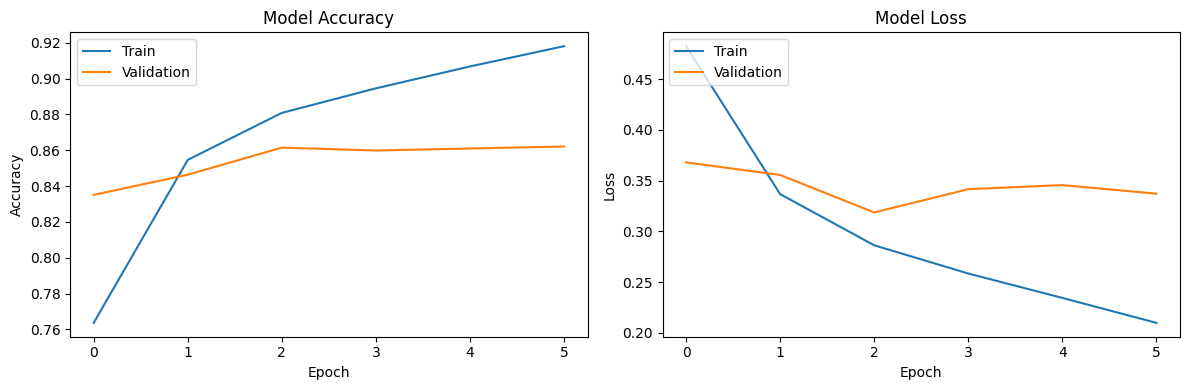

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy and loss during training
plt.figure(figsize=(12, 4))

# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**GRU**

In [ ]:
from keras.layers import GRU

def gru_clf(X_train,y_train,l,embedding_matrix):
    gru_clf=Sequential()
    gru_clf.add(Embedding(vocab_size, l, weights=[embedding_matrix],input_length=maxlen))
    gru_clf.add(GRU(128))
    gru_clf.add(Dense(1,activation='sigmoid'))
    gru_clf.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    hist=gru_clf.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
    return gru_clf,hist

In [ ]:
gru_clf,hist = gru_clf(X_train,y_train,100,embedding_matrix)

Epoch 1/6
250/250 [==============================] - 94s 361ms/step - loss: 0.4833 - acc: 0.7505 - val_loss: 0.3308 - val_acc: 0.8533
Epoch 2/6
250/250 [==============================] - 94s 374ms/step - loss: 0.3001 - acc: 0.8742 - val_loss: 0.3056 - val_acc: 0.8700
Epoch 3/6
250/250 [==============================] - 81s 323ms/step - loss: 0.2544 - acc: 0.8958 - val_loss: 0.3210 - val_acc: 0.8576
Epoch 4/6
250/250 [==============================] - 81s 322ms/step - loss: 0.2243 - acc: 0.9121 - val_loss: 0.3165 - val_acc: 0.8700
Epoch 5/6
250/250 [==============================] - 78s 313ms/step - loss: 0.1931 - acc: 0.9264 - val_loss: 0.3279 - val_acc: 0.8655
Epoch 6/6
250/250 [==============================] - 80s 320ms/step - loss: 0.1626 - acc: 0.9404 - val_loss: 0.3524 - val_acc: 0.8575


In [ ]:
# Evaluate the model
y_pred = gru_clf.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Print metrics
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred_binary)
print(f"F1 Score: {f1}")

recall = recall_score(y_test, y_pred_binary)
print(f"Recall: {recall}")

precision = precision_score(y_test, y_pred_binary)
print(f"Precision: {precision}")

auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc}")

kappa = cohen_kappa_score(y_test, y_pred_binary)
print(f"Kappa: {kappa}")

mcc = matthews_corrcoef(y_test, y_pred_binary)
print(f"MCC: {mcc}")

313/313 [==============================] - 8s 26ms/step
Accuracy: 0.864
F1 Score: 0.869054496437512
Recall: 0.8956142091684858
Precision: 0.8440246867402281
AUC: 0.9410994764921499
Kappa: 0.7278526812133944
MCC: 0.7292390689007353


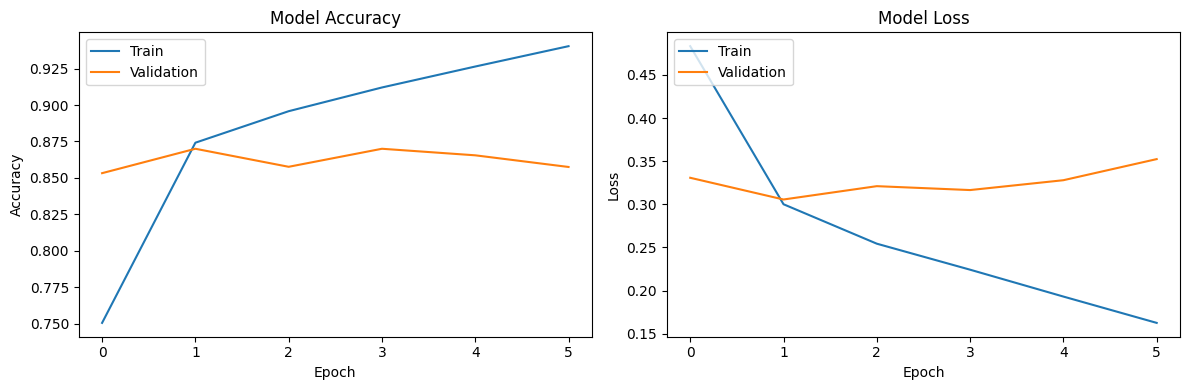

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy and loss during training
plt.figure(figsize=(12, 4))
history = hist
# Plot Training & Validation Accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot Training & Validation Loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()